<a href="https://colab.research.google.com/github/DingAngHenz/Practical-Discrete-Mathematics/blob/master/Exercise_Python_4_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

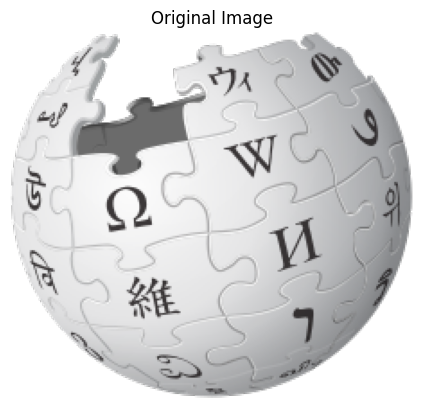

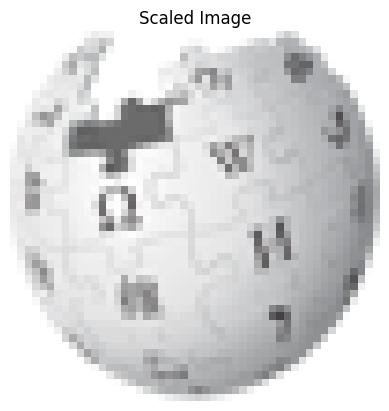

In [4]:

#get the info
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()


1.

In [7]:
from PIL import Image
import requests
from io import BytesIO

# Function to download and transpose an image from a URL
def transpose_image_from_url(image_url, output_path, direction="clockwise"):
    """
    Download an image from a URL, transpose it 90 degrees, and save it.

    :param image_url: URL of the image.
    :param output_path: Path to save the transposed image.
    :param direction: "clockwise" or "counterclockwise".
    """
    # Download the image
    response = requests.get(image_url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
    else:
        raise ValueError("Failed to fetch the image from the URL.")

    # Transpose the image
    if direction == "clockwise":
        transposed_image = image.transpose(Image.ROTATE_270)  # Rotate 90 degrees clockwise
    elif direction == "counterclockwise":
        transposed_image = image.transpose(Image.ROTATE_90)   # Rotate 90 degrees counterclockwise
    else:
        raise ValueError("Invalid direction. Use 'clockwise' or 'counterclockwise'.")

    # Save the transposed image
    transposed_image.save(output_path)
    print(f"Image transposed 90 degrees {direction} and saved at {output_path}")

# Example usage
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png"
output_image_path = "transposed_wikipedia_logo.png"

# Transpose the image 90 degrees clockwise
transpose_image_from_url(image_url, output_image_path, direction="clockwise")


Image transposed 90 degrees clockwise and saved at transposed_wikipedia_logo.png


In [9]:
pip install rembg pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00


2. Using rembg (fail)

In [16]:
from rembg import remove
import requests
from io import BytesIO
from PIL import Image

# Function to remove background from an image URL
def remove_background(image_url, output_path):
    """
    Remove the background of an image and save the result.

    :param image_url: URL of the image.
    :param output_path: Path to save the image with the background removed.
    """
    # Fetch the image from the URL
    response = requests.get(image_url)
    if response.status_code != 200:
        raise ValueError("Failed to fetch the image from the URL.")

    # Load the image content
    input_image = Image.open(BytesIO(response.content))

    # Remove background
    output_image = remove(input_image)

    # Save the result
    output_image.save(output_path, format="PNG")
    print(f"Background removed and saved to {output_path}")

# Example usage
image_url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"
output_image_path = "character_no_background.png"

remove_background(image_url, output_image_path)


ModuleNotFoundError: No module named 'onnxruntime'

2. Using opencv


In [19]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image

def remove_background(image_url, output_path):
    """
    Remove the background of an image using OpenCV and save the result.

    :param image_url: URL of the image.
    :param output_path: Path to save the processed image.
    """
    # Fetch the image from the URL
    response = requests.get(image_url)
    if response.status_code != 200:
        raise ValueError("Failed to fetch the image from the URL.")

    # Load the image into OpenCV
    image = np.array(Image.open(BytesIO(response.content)))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Convert to a flat 2D array for K-means clustering
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria for K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2  # Number of clusters (foreground and background)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert center colors back to uint8
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Create a mask for the foreground
    foreground = labels.reshape(image.shape[:2])
    mask = (foreground == 1).astype(np.uint8) * 255  # Assuming cluster 1 is the foreground

    # Smooth the mask
    mask = cv2.medianBlur(mask, 5)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Save the result
    cv2.imwrite(output_path, result)
    print(f"Background removed and saved to {output_path}")

# Example usage
image_url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"
output_image_path = "character_no_background.jpg"

remove_background(image_url, output_image_path)


Background removed and saved to character_no_background.jpg


In [18]:
!pip install mediapipe opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 52.3 MB/s eta 0:00:00


3.Find 2 creative common images online. Combine these 2 images side by side vertically. Export it as Jpg

In [23]:
from PIL import Image
import requests
from io import BytesIO

# URLs of the images
image_urls = [
    "https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/1200px-Wikipedia-logo-v2.svg.png",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSk_sDeaVQsEBgMosUliXXISLTBZxM_BIHvLQ&s"
]

# Download and open images
images = [Image.open(BytesIO(requests.get(url).content)) for url in image_urls]

# Ensure all images have the same width
width = min(img.size[0] for img in images)
resized_images = [img.resize((width, int(img.size[1] * width / img.size[0]))) for img in images]

# Calculate total height
total_height = sum(img.size[1] for img in resized_images)

# Create a new blank image with combined height
combined_image = Image.new('RGB', (width, total_height))

# Paste images one below the other
y_offset = 0
for img in resized_images:
    combined_image.paste(img, (0, y_offset))
    y_offset += img.size[1]

# Save the combined image
combined_image.save("combined_image.jpg", "JPEG")
print("Combined image saved as 'combined_image.jpg'")


Combined image saved as 'combined_image.jpg'


4. Change the image colour to gray tone.

In [24]:
from PIL import Image
import requests
from io import BytesIO

def convert_to_grayscale(image_url, output_path):
    """
    Convert an image to grayscale and save the result.

    :param image_url: URL of the image to process.
    :param output_path: Path to save the grayscale image.
    """
    # Fetch the image from the URL
    response = requests.get(image_url)
    if response.status_code != 200:
        raise ValueError("Failed to fetch the image from the URL.")

    # Open the image
    image = Image.open(BytesIO(response.content))

    # Convert the image to grayscale
    grayscale_image = image.convert("L")

    # Save the grayscale image
    grayscale_image.save(output_path)
    print(f"Grayscale image saved to {output_path}")

# Example usage
image_url = "https://m.media-amazon.com/images/M/MV5BMTU2NjA1ODgzMF5BMl5BanBnXkFtZTgwMTM2MTI4MjE@._V1_FMjpg_UX1000_.jpg"
output_image_path = "grayscale_image.jpg"

convert_to_grayscale(image_url, output_image_path)


Grayscale image saved to grayscale_image.jpg
